In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from IPython.display import display
import json

rcParams['text.color'] = '#c7d5cc'  # set the default text color

In [2]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3869321)
print(freeze)
print(df)
print(related)
print(tactics)

     teammate  match_id                                    id      x     y  \
0       False   3869321  2cbcc52d-7a83-46f7-bdb4-249923ab4f91  118.8  42.6   
1       False   3869321  2cbcc52d-7a83-46f7-bdb4-249923ab4f91   99.0  51.9   
2       False   3869321  2cbcc52d-7a83-46f7-bdb4-249923ab4f91   98.1  39.2   
3       False   3869321  2cbcc52d-7a83-46f7-bdb4-249923ab4f91  104.7  51.2   
4       False   3869321  2cbcc52d-7a83-46f7-bdb4-249923ab4f91  107.4  42.8   
..        ...       ...                                   ...    ...   ...   
320      True   3869321  411bfc7d-c827-49f4-bab0-669073097d5b  107.4  43.0   
321      True   3869321  411bfc7d-c827-49f4-bab0-669073097d5b  110.4  49.6   
322      True   3869321  411bfc7d-c827-49f4-bab0-669073097d5b  110.1  63.9   
323      True   3869321  411bfc7d-c827-49f4-bab0-669073097d5b  102.4  65.4   
324     False   3869321  20c06e80-a348-4422-afa8-30f4c1cce330  118.5  40.2   

     player_id                      player_name  position_id  \

In [3]:
print(df.id)

0       c54f1087-3fe0-4d37-b52f-4e8e248aba96
1       589bc04e-f080-4831-b1d3-67f91cb9b075
2       14eceb54-9ddf-4929-98fd-f704e083688d
3       052019c7-193f-408f-a8df-80149fa91a8a
4       6d72c397-38fc-4869-bdae-4adae1002915
                        ...                 
4703    91d841f2-d3eb-4d7f-b4ab-08cf59981e2e
4704    e6e1b627-2883-46ea-8f05-68081d023e07
4705    4ede5453-e909-4286-9fc7-b6fe39e52177
4706    46124db4-cdb1-45b3-a034-eba109f05a4d
4707    35241a17-3f8b-4ede-bb50-0989ef5d576b
Name: id, Length: 4708, dtype: object


In [4]:
related.columns

Index(['match_id', 'id', 'index', 'type_name', 'id_related', 'index_related',
       'type_name_related'],
      dtype='object')

In [5]:
print(df.columns)

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'pass_switch',
       'under_pressure', 'aerial_won', 'outcome_id', 'outcome_name',
       'ball_recovery_recovery_failure', 'foul_won_defensive', 'off_camera',
       'counterpress', 'pass_cross', 'out', 'injury_stoppage_in_chain',
       'shot_statsbomb_xg', 'technique_id', 'technique_name',
       'shot_first_time', 'goalkeeper_position_id', 'goalkeeper_position_name',
       'block_offensive', 'dribble_overrun', 'ball_re

In [6]:
print(df.body_part_name == 'Right Foot')

0       False
1       False
2       False
3       False
4        True
        ...  
4703    False
4704    False
4705    False
4706    False
4707    False
Name: body_part_name, Length: 4708, dtype: bool


In [7]:
mask_messi = (df.type_name == 'Pass') & (df.player_id == 5503)

In [8]:
df_pass = df.loc[mask_messi, ['x', 'y', 'end_x', 'end_y', 'outcome_name', 'id', 'body_part_name']]
mask_complete = df_pass.outcome_name.isnull()

In [9]:
df_pass.head()

,x,y,end_x,end_y,outcome_name,id,body_part_name
114,49.8,55.1,44.1,46.7,NaN,29d22ca5-2dcb-4fdf-a792-1f363f6a7bed,Right Foot
148,71.0,74.3,57.4,72.5,NaN,09a4a47f-63b8-409d-99e6-92df2370e322,Left Foot
215,87.0,60.1,109.6,61.3,NaN,864ed743-6bf5-4041-92c5-51b357a29a78,Left Foot
308,93.5,61.0,98.7,60.6,NaN,71aa1f78-e7c6-4d74-aeeb-8d5dc44de68f,NaN
421,39.1,50.0,52.8,74.5,NaN,34a3dc12-a229-4672-a064-8c876eec9f96,Left Foot


In [10]:
# Filter the dataframe for Messi's left-footed passes
mask_messi_left = (df_pass['body_part_name'] == 'Left Foot') & (df.type_name == 'Pass') & (df.player_id == 5503)
mask_messi_right = (df_pass['body_part_name'] == 'Right Foot') & (df.type_name == 'Pass') & (df.player_id == 5503)

Text(0.5, 0.98, "Messi's left-footed passes vs Netherlands")

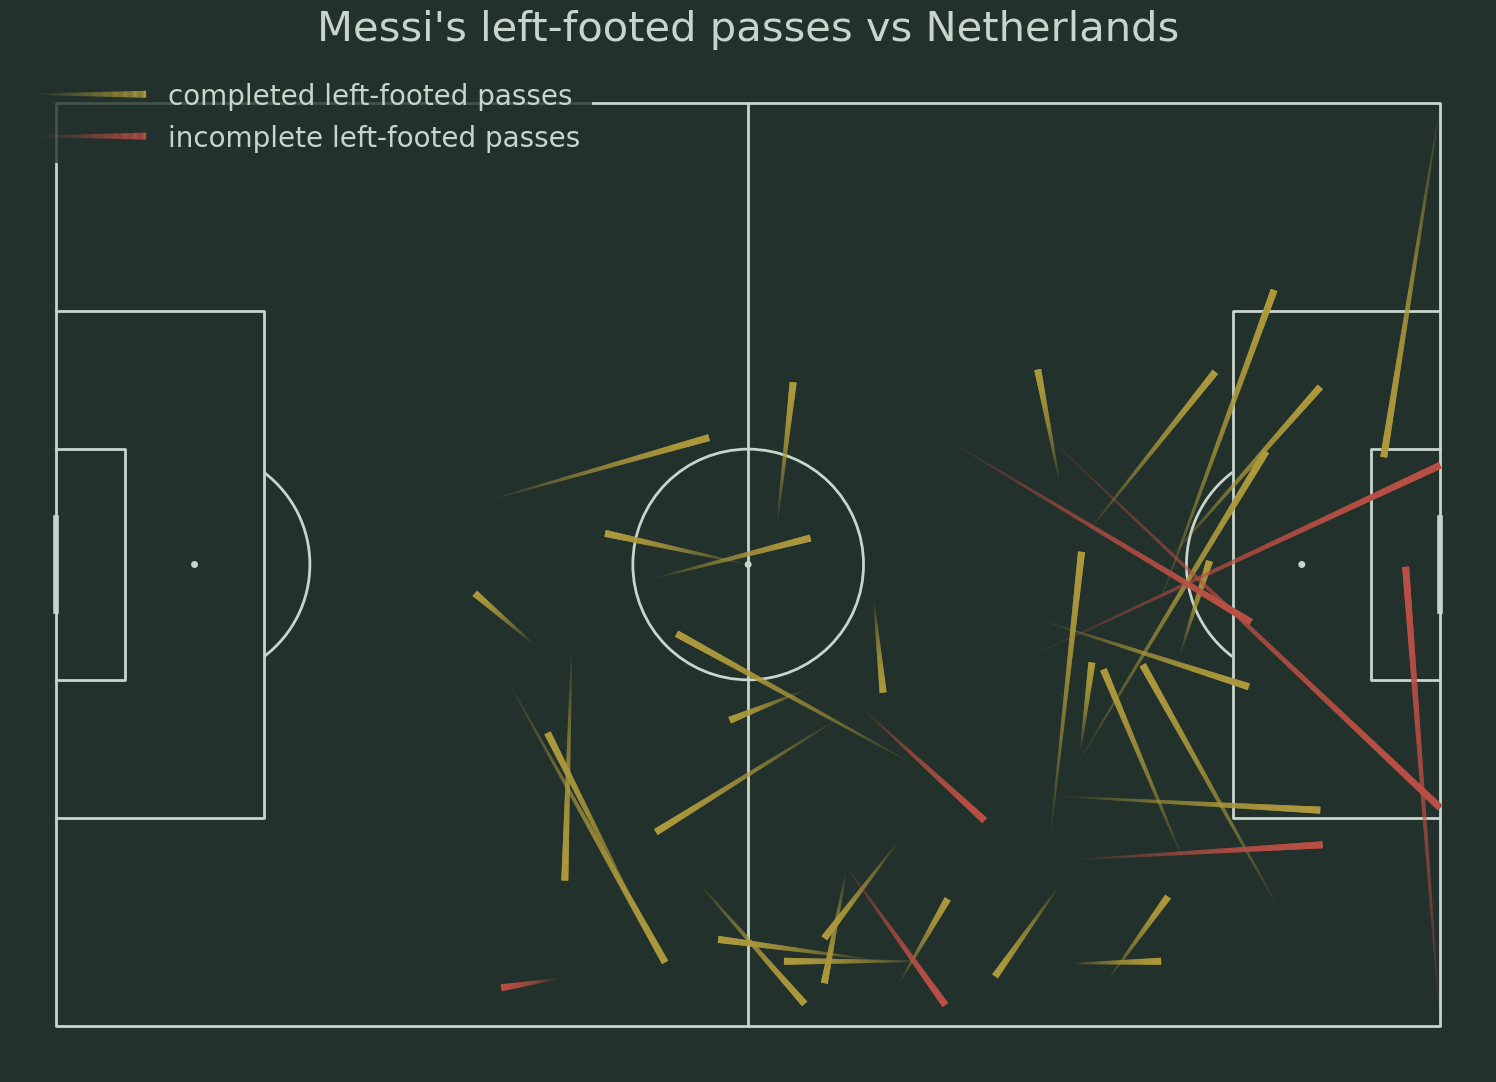

In [13]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the left-footed completed passes
lc1 = pitch.lines(df_pass[mask_messi_left & mask_complete].x, df_pass[mask_messi_left & mask_complete].y,
                  df_pass[mask_messi_left & mask_complete].end_x, df_pass[mask_messi_left & mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed left-footed passes',
                  color='#ad993c', ax=ax)

# Plot the other left-footed passes
lc2 = pitch.lines(df_pass[mask_messi_left & ~mask_complete].x, df_pass[mask_messi_left & ~mask_complete].y,
                  df_pass[mask_messi_left & ~mask_complete].end_x, df_pass[mask_messi_left & ~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='incomplete left-footed passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's left-footed passes vs Netherlands", fontsize=30)


Text(0.5, 0.98, "Messi's right-footed passes vs Netherlands")

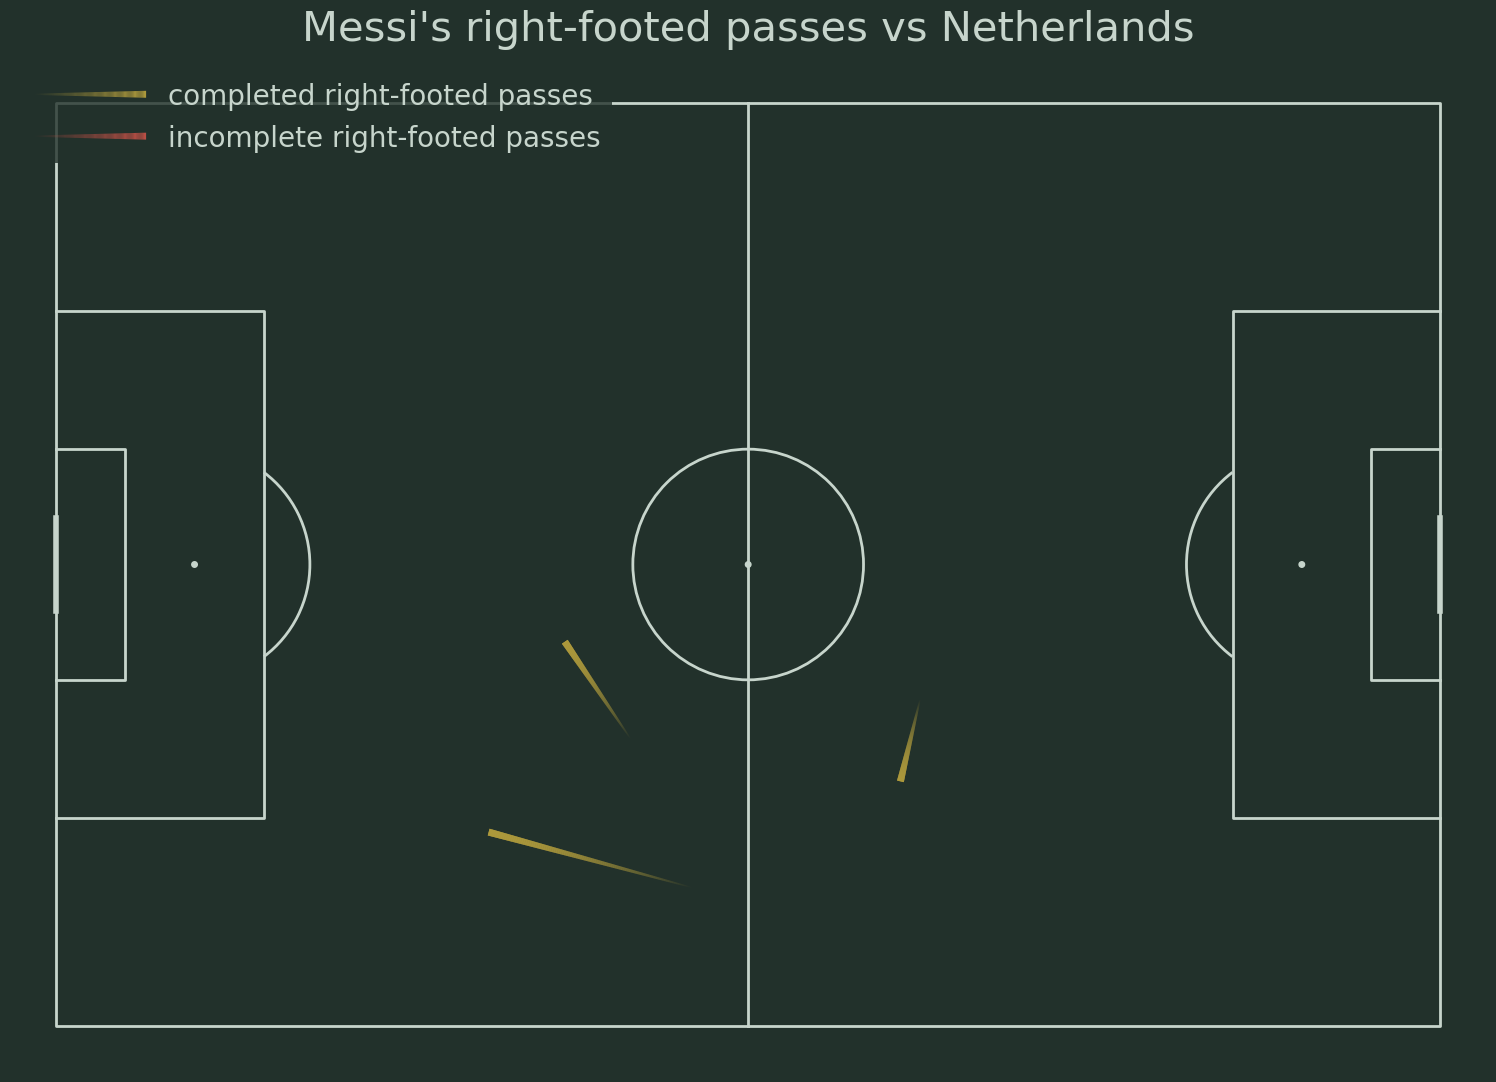

In [14]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the right-footed completed passes
lc1 = pitch.lines(df_pass[mask_messi_right & mask_complete].x, df_pass[mask_messi_right & mask_complete].y,
                  df_pass[mask_messi_right & mask_complete].end_x, df_pass[mask_messi_right & mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed right-footed passes',
                  color='#ad993c', ax=ax)

# Plot the other right-footed passes
lc2 = pitch.lines(df_pass[mask_messi_right & ~mask_complete].x, df_pass[mask_messi_right & ~mask_complete].y,
                  df_pass[mask_messi_right & ~mask_complete].end_x, df_pass[mask_messi_right & ~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='incomplete right-footed passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's right-footed passes vs Netherlands", fontsize=30)


# Link used for this visualization

In [ ]:
#https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_lines.html#sphx-glr-gallery-pitch-plots-plot-lines-py